In [6]:
import yfinance as yf
from datetime import datetime, date

import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [3]:
start_date = datetime(1995,1,1)
end_date = datetime.today()

In [4]:
vix_ticker = "^VIX"

In [5]:
data = yf.download(vix_ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

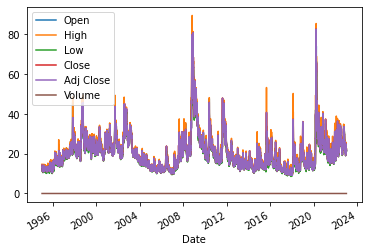

In [6]:
data.plot()

In [15]:
# first creating a rolling object of 90 values, and then computing its mean
ma = data['Adj Close'].rolling(90).mean()
ma = ma.dropna()

In [19]:
ma.max()

54.59811104668511

In [20]:
cutoff_points = [-np.inf, 14, 18, 24, np.inf] # these are x axis points and in between region will be assigned to labels
labels = range(4)

In [21]:
df = pd.cut(ma, bins=cutoff_points, labels=labels)

<AxesSubplot:>

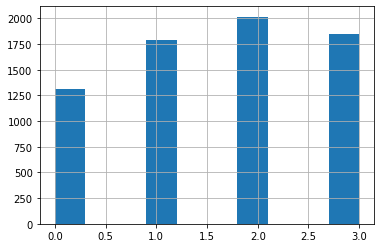

In [24]:
df.hist()

In [29]:
cmap = plt.get_cmap("RdYlGn_r")

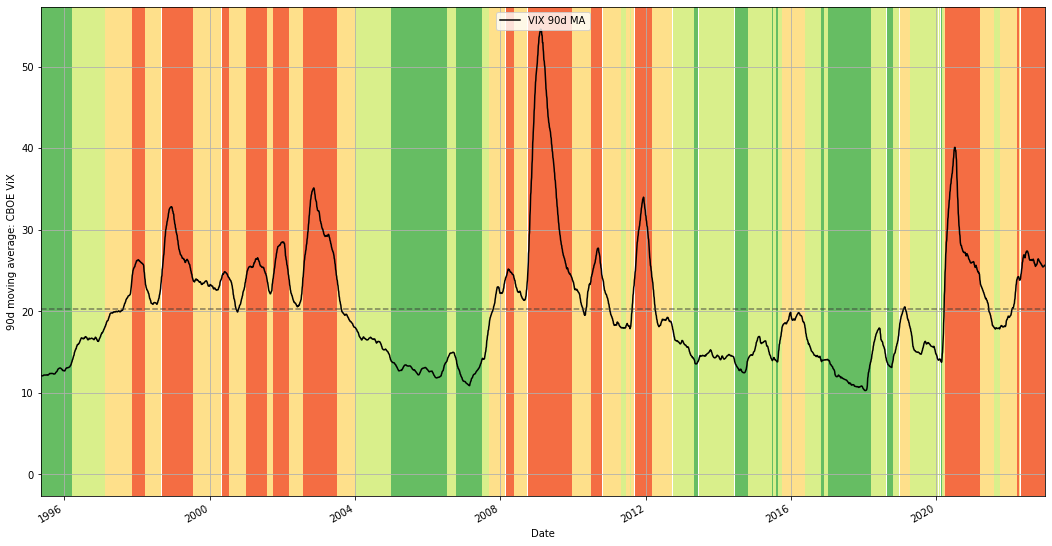

In [49]:
ma.plot(color='black', marker='', figsize=(18, 10) , label='VIX 90d MA')
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("90d moving average: CBOE ViX")
ax.grid("False")
ax.legend(loc="upper center")
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])
ax.axhline(data['Adj Close'].mean(), linestyle='dashed', color='xkcd:dark grey', alpha=0.6, label='Full-period mean', marker='')

trans= mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2,0.4,0.6,0.8])):
    ax.fill_between(ma.index, 0, 1, where=df==i, facecolor =color, transform=trans)

In [44]:
# Look closely there are 4 colors, which are define by pd.cut method

In [45]:
for i, color in enumerate(cmap([0.2,0.4,0.6,0.8])):
    print(i, color)

0 [0.4        0.74117647 0.38823529 1.        ]
1 [0.85098039 0.9372549  0.54509804 1.        ]
2 [0.99607843 0.87843137 0.54509804 1.        ]
3 [0.95686275 0.42745098 0.2627451  1.        ]


Date
1995-05-10    False
1995-05-11    False
1995-05-12    False
1995-05-15    False
1995-05-16    False
              ...  
2022-12-22    False
2022-12-23    False
2022-12-27    False
2022-12-28    False
2022-12-29    False
Name: Adj Close, Length: 6960, dtype: bool

In [1]:
def plot_visual_regime_switching_time_series(df, title, y_label, std_factor):
  """
  A method which plots the region of high volatility and low volatility 
  in the time series based on the moving average value from last 90 days.

  Args:
    df (pd.DataFrame) : Time Series dataframe
    title (str) : Plotted chart title
    y_label (str) : Chart Y value variable
    std_factor (float) : number of standard deviation away from the mean used as dividing regions
  """
  ma = df.rolling(90).mean()
  ma = ma.dropna()
  ma_mean = ma.mean()
  ma_std = ma.std()
  cutoff_points = [-np.inf, ma_mean - std_factor*ma_std, ma_mean, ma_mean + std_factor*ma_std, np.inf]
  labels = range(4)
  df_new = pd.cut(ma, bins=cutoff_points, labels=labels)
  
  # plotting the curve
  cmap = plt.get_cmap("RdYlGn_r")
  df.plot(color='black', marker='', figsize=(16, 10) , label=y_label, title=title)
  ax = plt.gca()
  ax.set_xlabel("Date")
  ax.set_ylabel(y_label)
  ax.grid("False")
  ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])
  ax.axhline(df.mean(), linestyle='dashed', color='xkcd:dark grey', alpha=0.6, label='Full-period mean', marker='')
  ax.plot(ma, label = "90 days Moving average")
  ax.legend(loc="upper left")

  trans= mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
  for i, color in enumerate(cmap([0.2,0.4,0.6,0.8])):
      ax.fill_between(ma.index, 0, 1, where=df_new==i, facecolor =color, transform=trans)
  
  return

[*********************100%***********************]  1 of 1 completed


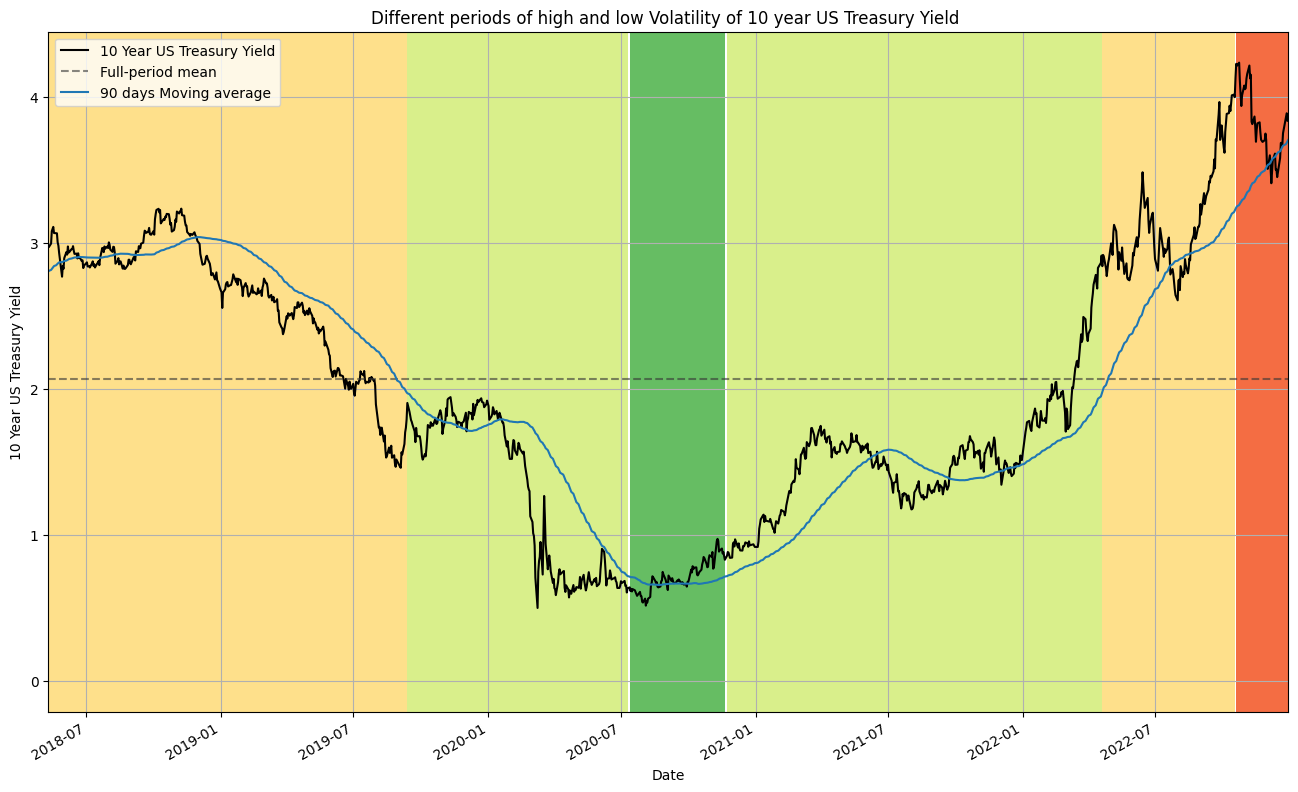

In [7]:
treasury_ticker = "^TNX"
start = date(2018, 1, 1)
end = date(2022, 12, 31)
ts_yield = yf.download(treasury_ticker, start, end)
ts_yield = ts_yield.rename(columns={"Adj Close" : "IR"})
ts_yield = ts_yield['IR'] 
plot_visual_regime_switching_time_series(df=ts_yield, title = "Different periods of high and low Volatility of 10 year US Treasury Yield ", y_label="10 Year US Treasury Yield", std_factor=1.5)